### 1. 문제 정의
- 보스턴 주택 가격 데이터를 사용하여 주택 가격을 예측해 보자.
- 회귀모델
- LinearRegression(), SGDRegression()

### 2. 데이터 수집
- csv파일

In [110]:
import pandas as pd

In [111]:
boston_data = pd.read_csv('./boston_housing.csv', index_col=0)
boston_data.iloc[:,1:]


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [112]:
boston_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [113]:
# 문제데이터(X), 답 데이터(y) 분리
X = boston_data.drop('MEDV', axis=1)
X

y = boston_data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [114]:
X.info()
X.ndim

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


2

### 3. 데이터 전처리
- 결측치, 이상치 확인하는 단계
- 학습용 데이터로 전처리 생략

#### 3-1. 특성확장
- 특성(문제)들끼리 곱해서 새로운 특성을 만들어보자 -->Linear 모델의 성능을 높이기 위해

In [115]:
# 특성 이름 확인
col = X.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [116]:
# 특성 개수 확인
col.size

13

In [117]:
# 특성확장을 위한 반복분
# 1. 전체 컬럼을 순서대로 꺼내오는 for
for i in range(col.size):
    # 2. 곱해지는 컬럼을 정하는 for문 한 개 필요(0~12,1~12,2~12,...12~12)
    for j in range(i, col.size):
        X[col[i] + '*' + col[j]] = X[col[i]] * X[col[j]]

X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'TAX*TAX', 'TAX*PTRATIO', 'TAX*B', 'TAX*LSTAT', 'PTRATIO*PTRATIO',
       'PTRATIO*B', 'PTRATIO*LSTAT', 'B*B', 'B*LSTAT', 'LSTAT*LSTAT'],
      dtype='object', length=104)

In [118]:
X.shape

(506, 104)

In [119]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


#### 3-2. 데이터 스케일링
- 주의사항: 데이터 전처리 마지막에 사용
- 결측치가 없는 상태에서 사용해야만 함

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
minmax = MinMaxScaler()

In [122]:
# 수정 전 코드 (오류 발생)
# X_trans = minmax.transform(X)

# 수정 후 코드
X_scaled = minmax.fit_transform(X)

#### 4-1. 상관관계 분석
- heatmap
- 피어슨 상관계수: 두 컬럼의 선형도 판단
- 컬럼 간의 상관도(선형관계)를 확인

In [123]:
# 문제와 답을 나누기 전 데이터
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


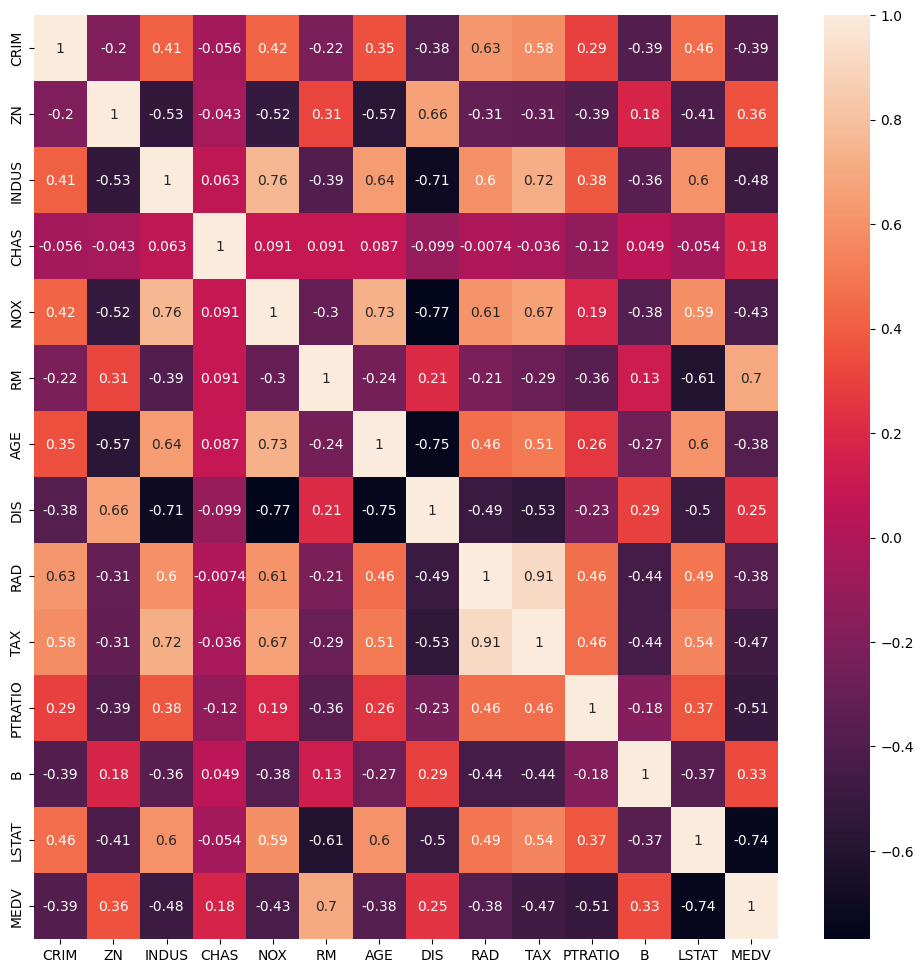

In [124]:
# 관계를 시각화하여 보기 좋게 만들어보자!
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 그림판 설정
plt.figure(figsize=(12,12))

# 2) 그래프 그리기
sns.heatmap(boston_data.corr(), annot=True) 

# 3) 그림 출력!
plt.show()

### 5. 모델 선택 및 하이퍼파라미터 튜닝


In [125]:
# 1) 수학적 공식 Linear모델
from sklearn.linear_model import LinearRegression

# 2) 경사하강법
from sklearn.linear_model import SGDRegressor

In [126]:
# 모델 생성
# 1)해석적 모델
linear_model = LinearRegression()
linear_model

# 2) 경사하강법
sgd_model = SGDRegressor(eta0=0.01, verbose=1)
sgd_model

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,None


### 5-1. 훈련과 평가 데이터 분리
- 훈련7 : 평가3

In [127]:
# 분리하는 라이브러리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

# 확인용
print("훈련세트: ", X_train.shape, X_test.shape)
print("테스트 세트: ", y_train.shape, y_test.shape)

훈련세트:  (354, 104) (152, 104)
테스트 세트:  (354,) (152,)


### 6. 모델 학습

In [128]:
# 1) 해석적 모델
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [129]:

# 2) 경사하강법
sgd_model.fit(X_train, y_train)

-- Epoch 1
Norm: 8.41, NNZs: 104, Bias: 3.214094, T: 354, Avg. loss: 44.043275
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.39, NNZs: 104, Bias: 3.727609, T: 708, Avg. loss: 26.420635
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.09, NNZs: 104, Bias: 4.111373, T: 1062, Avg. loss: 23.683609
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.57, NNZs: 104, Bias: 4.372584, T: 1416, Avg. loss: 21.721204
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.94, NNZs: 104, Bias: 4.558685, T: 1770, Avg. loss: 20.125880
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 11.45, NNZs: 104, Bias: 4.857683, T: 2124, Avg. loss: 19.071338
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 11.75, NNZs: 104, Bias: 4.976579, T: 2478, Avg. loss: 18.019399
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 12.12, NNZs: 104, Bias: 5.166788, T: 2832, Avg. loss: 17.277789
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 12.49, NNZs: 104, Bias: 5.368017, T: 3186, Avg. loss: 16.46

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,None


### 7. 예측 및 평가

In [130]:
# 1) 해석적 모델
linear_model.score(X_train, y_train)  # 93점

0.9332471683804471

In [131]:
# 테스트용 데이터 평가
linear_model.score(X_test, y_test)  # 80점

# 과대적합

0.80935367589194

In [132]:
# 2) 경사하강법
# 훈련용 데이터 평가
sgd_model.score(X_train, y_train)

# 과소적합

0.7663877420717355

In [133]:
# 테스트용 데이터 평가
sgd_model.score(X_test, y_test)

0.6862969036235432

### 8. 규제를 적용시킨 모델
- LinearRegression 모델이 가지고 있는 단점 <br>
    ㄴ 모델이 잘못되었을 경우 수정이 불가능 -> 과대적합 상태를 제어 불가 <br>
    ㄴ 규제를 가해서 단점을 해소
- LinearRegression + L1 규제 ==> 특성 중 중요한 특성'만' 이용
- LinearRegression + L2 규제 ==> 중요도가 높은 특성은 더 중요하게, 중요도가 낮은 것들을<br>
                                 덜 중요하게 반영(0이 되지는 않음)
- 규제? ==> 선형모델에서 가중치에 영향을 주겠다 <br>
        ==> 가중치의 비중을 줄이겠다.

### 8-1. Ridge(L2)활용하기

In [134]:
# 라이브러리 불러오기
from sklearn.linear_model import Ridge, Lasso

In [135]:
# 규제를 크게, 적게 했을 때 차이를 볼려고 함.
# 하이퍼파라미터(alpha) 튜닝하는 함수 정의

# L2(Ridge)
def ridge_alpha(alpha):
    # ridge모델 생성(객체 생성)
    ridge = Ridge(alpha=alpha)
    # 학습
    ridge.fit(X_train, y_train)
    # 평가
    # 훈련용평가
    print(alpha, "학습률 train_score: ",ridge.score(X_train, y_train))
    # 테스트용평가
    print(alpha, "학습률 test_score", ridge.score(X_test, y_test))

In [136]:
# 규제가 심해지면 모델이 복잡해 지는 것을 방지!
# 과대적합일 때 사용해서 과대적합을 방지
# ==> 과소적합이 생길 이슈가 있음

# 규제가 적어지면 모델이 복잡해 지는 것을 방지!
# 과소적합일 때 사용해서 과소적합을 방지
# ==> 과대적합이 생길 이슈가 있음

ridge_alpha(0.01)
ridge_alpha(0.1)
ridge_alpha(1)
ridge_alpha(10)
ridge_alpha(100)

0.01 학습률 train_score:  0.9221166711911322
0.01 학습률 test_score 0.8740830034872126
0.1 학습률 train_score:  0.8956144374795688
0.1 학습률 test_score 0.8707619590126977
1 학습률 train_score:  0.8360143538944645
1 학습률 test_score 0.7859478376780065
10 학습률 train_score:  0.7610192708361805
10 학습률 test_score 0.6881701591663667
100 학습률 train_score:  0.5867470593740552
100 학습률 test_score 0.4908590961177438


In [140]:
import numpy as np

# L1(Lasso)
def lasso_alpha(alpha):
    # ridge모델 생성(객체 생성)
    lasso = Lasso(alpha=alpha)
    # 학습
    lasso.fit(X_train, y_train)
    # 평가
    # 훈련용평가
    print(alpha, "학습률 train_score: ",lasso.score(X_train, y_train))
    # 테스트용평가
    print(alpha, "학습률 test_score", lasso.score(X_test, y_test))

    # 사용한 특성의 개수
    print('사용한 특성의 개수: ', np.sum(lasso.coef_ != 0))

In [ ]:
# 규제를 늘릴수록 점수가 안 나옴 ==> 과소적합
# 규제를 줄일수록 점수가 잘 나옴 ==> 과대적합

lasso_alpha(0.001)
lasso_alpha(0.01)
lasso_alpha(0.1)
lasso_alpha(1)
lasso_alpha(10)
lasso_alpha(100)
lasso_alpha(1000)

0.001 학습률 train_score:  0.9090011997244047
0.001 학습률 test_score 0.8600261087920087
사용한 특성의 개수:  78
0.01 학습률 train_score:  0.8604801273989778
0.01 학습률 test_score 0.8154143659124607
사용한 특성의 개수:  29
0.1 학습률 train_score:  0.759085798220589
0.1 학습률 test_score 0.6811210661785797
사용한 특성의 개수:  8
1 학습률 train_score:  0.2572648124335003
1 학습률 test_score 0.19118225902593067
사용한 특성의 개수:  3
10 학습률 train_score:  0.0
10 학습률 test_score -6.386072533048903e-05
사용한 특성의 개수:  0
100 학습률 train_score:  0.0
100 학습률 test_score -6.386072533048903e-05
사용한 특성의 개수:  0
1000 학습률 train_score:  0.0
1000 학습률 test_score -6.386072533048903e-05
사용한 특성의 개수:  0


c:\Users\USER\anaconda3\envs\dev\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\envs\dev\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+02, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(


### Ridge랑 Lasso의 차이
- Ridge는 중요도를 조정한다 <br>
    ㄴ 중요한 건 더 중요하고, 안 중요한건 덜 중요하게
- Lasso는 안중요한건 삭제 